In [1]:
# import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import subprocess as sp
import os
import time

In [2]:
#Q1
with open("sample.html", "r") as file:
    html_content = file.read()
    
soup1 = BeautifulSoup(html_content, "html.parser")
contact_section = soup1.find('section', id="contact")
email_tag = contact_section.find('a', href=True)
email = email_tag.get('href').replace("mailto:", "")
email

'contact@example.com'

In [3]:
with open("rankings.html", "r") as file:
    html_content = file.read()
    
soup2 = BeautifulSoup(html_content, "html.parser")
table = soup2.find('table')
headers = [header.text.strip() for header in table.find_all('th')]
rows = []
for row in table.find_all('tr')[1:]:
    cells = row.find_all('td')
    row_data = [cell.text.strip() for cell in cells]
    rows.append(row_data)

rankings_df = pd.DataFrame(rows, columns=headers)

rankings_df

,World Rank,Institution,Country,National Rank,Education Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1,Harvard University,USA,1,1,1,1,1,100
1,2,Massachusetts Institute of Technology,USA,2,4,12,2,8,96.7
2,3,Stanford University,USA,3,10,4,3,2,95.1
3,4,University of Cambridge,United Kingdom,1,3,25,4,10,94.1
4,5,University of Oxford,United Kingdom,2,7,27,9,4,93.3
...,...,...,...,...,...,...,...,...,...
1995,1996,Santa Catarina State University,Brazil,56,-,936,-,1938,65.8
1996,1997,Yancheng Institute of Technology,China,275,-,-,-,1920,65.7
1997,1998,Xi'an University of Science and Technology,China,276,-,994,-,1937,65.7
1998,1999,CEU San Pablo University,Spain,53,-,568,-,1992,65.7


In [4]:
#Q2
germany_ranked = rankings_df.loc[rankings_df["Country"] == "Germany"]
highest_ranked_germany = germany_ranked.loc[germany_ranked["National Rank"].astype(int) == 1]

highest_ranked_germany_institution = highest_ranked_germany["Institution"].values[0]
highest_ranked_germany_institution

'Ludwig Maximilian University of Munich'

In [5]:
#Q3
germany_world_rank = highest_ranked_germany["World Rank"].astype(int).values[0]

usa_ranked_better_than_germany = rankings_df.loc[
    (rankings_df["Country"] == "USA") & 
    (rankings_df["World Rank"].astype(int) < germany_world_rank)
]

lowest_10_usa = usa_ranked_better_than_germany.tail(10)

lowest_10_usa_institutions = lowest_10_usa["Institution"].tolist()
lowest_10_usa_institutions

['Duke University',
 'University of Illinois at Urbana–Champaign',
 'University of Washington - Seattle',
 'University of Wisconsin–Madison',
 'New York University',
 'University of Texas at Austin',
 'University of California, San Diego',
 'University of California, San Francisco',
 'University of North Carolina at Chapel Hill',
 'Dartmouth College']

In [6]:
#Q4
india_ranks = rankings_df.loc[rankings_df["Country"] == "India"]
india_ranks["Research Rank"] = pd.to_numeric(india_ranks["Research Rank"], errors='coerce')
india_ranks = india_ranks.dropna(subset=["Research Rank"])
india_ranks_sorted = india_ranks.sort_values(by="Research Rank", ascending=True).head(5)
india_ranks_sorted["Institution"].tolist()

/tmp/ipykernel_122832/2275318195.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_ranks["Research Rank"] = pd.to_numeric(india_ranks["Research Rank"], errors='coerce')


['Indian Institute of Science',
 'Tata Institute of Fundamental Research',
 'Indian Institute of Technology Bombay',
 'Indian Institute of Technology Madras',
 'University of Delhi']

In [7]:
#Q5
output = sp.check_output(["git", "log"], cwd="flask")
output_str = str(output, "utf-8").split("\n")
first_line = output_str[0]
first_line

'commit 660994efc761efdfd49ca442b73f6712dc77b6cf'

In [8]:
#Q6
list_of_commit_numbers = []
for line in output_str:
    if line.startswith("commit"):
        commit_number = line.split()[1]
        list_of_commit_numbers.append(commit_number)
        
list_of_commit_numbers[-10:]

['a9d4ea81da28ee9c894bf9d45adc4cfa9d52fddc',
 '727c701686c18c4a27ca523eb0c5862d497be24e',
 '4edec48b74dbb9d571e927b69b24c30ec0624975',
 '625eba4bb403296a8bbc1e72cc9cf4a5126f6c02',
 '4aa76212d1be9b17a57249549c2a73fb10b6cda8',
 '3b36bef2e6165bb4dad73d17f23ee1879e99f497',
 '44b42e0fbd93d86e0f4e929bda8e5fb63e81035d',
 '4ec7d2a0d8eac4f915dc0d38a886cd57045bb0c4',
 'b15ad394279fc3b7f998fa56857f334a7c0156f6',
 '33850c0ebd23ae615e6823993d441f46d80b1ff0']

In [9]:
commit_to_checkout = list_of_commit_numbers[-100]

sp.check_output(["git", "checkout", commit_to_checkout], cwd="flask")
with open("flask/README", "r") as file:
    readme_content = file.read()

sp.check_output(["git", "checkout", "main"], cwd="flask")

Note: switching to 'f878919753a909e45b2d5448aa175f4f9129ff24'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at f8789197 With -> with in headline
Previous HEAD position was f8789197 With -> with in headline
Switched to branch 'main'


b"Your branch is up to date with 'origin/main'.\n"

In [10]:
#Q7
readme_content

"\n                          // Flask //\n\n         because sometimes a pocket knife is not enough\n\n\n    ~ What is Flask?\n\n      Flask is a microframework for Python based on Werkzeug\n      and Jinja2.  It's intended for small scale applications\n      and was development with best intentions in mind.\n\n    ~ Is it ready?\n\n      A preview release is out now, and I'm hoping for some\n      input about what you want from a microframework and\n      how it should look like.  Consider the API to slightly\n      improve over time.\n\n    ~ What do I need?\n\n      Jinja 2.4 and Werkzeug 0.6.1.  `easy_install` will\n      install them for you if you do `easy_install Flask==dev`.\n      I encourage you to use a virtualenv.  Check the docs for\n      complete installation and usage instructions.\n\n    ~ Where are the docs?\n\n      Go to http://flask.pocoo.org/ for a prebuild version of\n      the current documentation.  Otherwise build them yourself\n      from the sphinx sources i

In [11]:
#Q8
pull_request_users = {}

for line in output_str:
    if "Merge pull request" in line and "from" in line:
        username = line.split("from ")[1].split("/")[0]
        
        if username not in pull_request_users:
            pull_request_users[username] = 1
        else:
            pull_request_users[username] += 1

users_with_10_or_more_prs = {}

for user, count in pull_request_users.items():
    if count >= 10:
        users_with_10_or_more_prs[user] = count

users_with_10_or_more_prs

{'pallets': 204,
 'pgjones': 14,
 'greyli': 42,
 'ThiefMaster': 11,
 'davidism': 45,
 'untitaker': 20,
 'ThomasWaldmann': 13,
 'SimonSapin': 11}

In [12]:
#Q9
try:
    msg = sp.check_output(["pip3", "instal"], stderr=sp.STDOUT)
except sp.CalledProcessError as e:
    msg = e.output

msg.decode("utf-8")

'ERROR: unknown command "instal" - maybe you meant "install"\n'

In [13]:
def rand_df(rows):
    return pd.DataFrame(np.random.randint(10, size=(rows, 5)),
                        columns=["A", "B", "C", "D", "E"],
                        index=[f"r{i}" for i in range(1, rows+1)])

In [14]:
df1 = rand_df(1000)
df2 = rand_df(2000)
df3 = rand_df(3000)
df4 = rand_df(4000)
df5 = rand_df(5000)
df6 = rand_df(6000)

In [15]:
def get_time(df, type_of_looping):
    
    if type_of_looping == 'iterrows':
        t0 = time.time()
        for row in df.iterrows():
            pass
        t1 = time.time()
        
        return (t1 - t0)*1000
    
    if type_of_looping == 'itertuples':
        t0 = time.time()
        for row in df.itertuples():
            pass
        t1 = time.time()
        
        return (t1 - t0)*1000
    
    if type_of_looping == 'loc':
        t0 = time.time()
        total = 0
        for idx in df.index:
            for col in df.columns:
                total += df.loc[idx, col]
        t1 = time.time()
        
        return (t1 - t0)*1000
    
    if type_of_looping == 'at':
        t0 = time.time()
        total = 0
        for idx in df.index:
            for col in df.columns:
                total += df.at[idx, col]
        t1 = time.time()
        
        return (t1 - t0)*1000


In [16]:
times = {}
iterrows_times = []
itertuples_times = []
loc_times = []
at_times = []
dfs = [df1, df2, df3, df4, df5, df6]

for df in dfs:
    iterrows_time = get_time(df, 'iterrows')
    iterrows_times.append(iterrows_time)
    
    itertuples_time = get_time(df, 'itertuples')
    itertuples_times.append(itertuples_time)
    
    loc_time = get_time(df, 'loc')
    loc_times.append(loc_time)
    
    at_time = get_time(df, 'at')
    at_times.append(at_time)

times['iterrows'] = iterrows_times
times['itertuples'] = itertuples_times
times['loc'] = loc_times
times['at'] = at_times

times

{'iterrows': [40.461063385009766,
  62.3469352722168,
  95.18170356750488,
  127.97236442565918,
  151.90982818603516,
  181.03551864624023],
 'itertuples': [1.7347335815429688,
  2.1409988403320312,
  3.080606460571289,
  3.548860549926758,
  4.347801208496094,
  4.941225051879883],
 'loc': [49.45802688598633,
  95.67713737487793,
  144.32144165039062,
  190.63687324523926,
  250.80037117004395,
  286.48853302001953],
 'at': [26.65543556213379,
  51.778316497802734,
  78.75967025756836,
  104.34818267822266,
  130.91373443603516,
  158.80823135375977]}

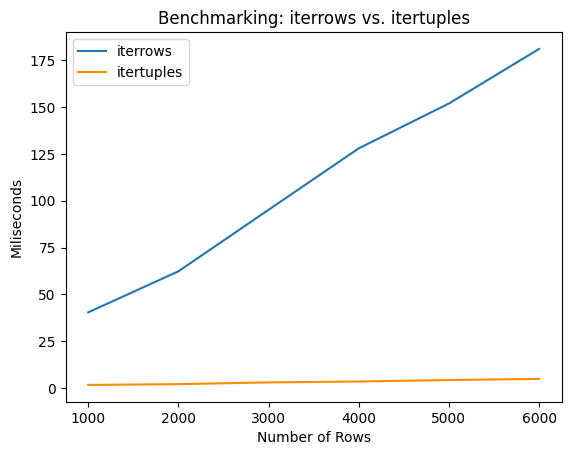

In [17]:
#Q10
plt.figure()
plt.plot([1000, 2000, 3000, 4000, 5000, 6000], times['iterrows'], label = 'iterrows')
plt.plot([1000, 2000, 3000, 4000, 5000, 6000], times['itertuples'], label = 'itertuples', color = 'darkorange')
plt.xlabel('Number of Rows')
plt.ylabel('Miliseconds')
plt.title('Benchmarking: iterrows vs. itertuples')
plt.legend()
plt.show()

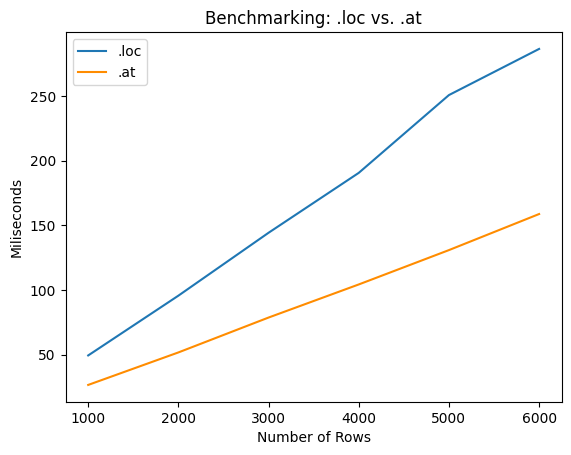

In [18]:
#Q11
plt.figure()
plt.plot([1000, 2000, 3000, 4000, 5000, 6000], times['loc'], label = '.loc')
plt.plot([1000, 2000, 3000, 4000, 5000, 6000], times['at'], label = '.at', color = 'darkorange')
plt.xlabel('Number of Rows')
plt.ylabel('Miliseconds')
plt.title('Benchmarking: .loc vs. .at')
plt.legend()
plt.show()

In [19]:
def laugh(x):
    return "qwerty" * x

In [20]:
df_sizes = [2500, 5000, 7500, 10000, 12500 ,15000, 17500, 20000]

loop_times = []
apply_times = []

for size in df_sizes:
    df = rand_df(size)

    t0 = time.time()
    result = df["A"].apply(laugh).tolist()
    t1 = time.time()
    apply_times.append((t1 - t0) * 1000)
    
    t0 = time.time()
    result = []
    for val in df["A"]:
        result.append(laugh(val))
    t1 = time.time()
    loop_times.append((t1 - t0) * 1000)

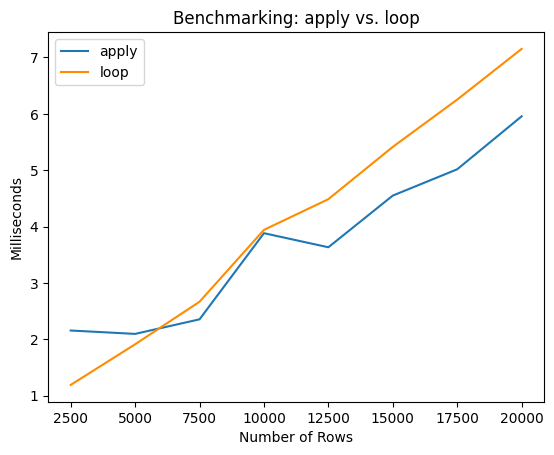

In [21]:
#Q12
plt.figure()
plt.plot(df_sizes, apply_times, label='apply')
plt.plot(df_sizes, loop_times, label='loop', color='darkorange')
plt.xlabel('Number of Rows')
plt.ylabel('Milliseconds')
plt.title('Benchmarking: apply vs. loop')
plt.legend()
plt.show()